In [ ]:
from tensorflow import keras
print('keras: ', keras.__version__)
from tensorflow.keras.layers import Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

keras:  2.8.0


## Objectives
After completing this practical exercise, students should be able to:
1. [Understand how to use word embeddings](#word)
2. [Understand how to use the simple recurrent layer](#simple)
3. [Understand how to use LSTM layers to build RNN ](#lstm)
4. [Exercise Two: Use GRU layers to build RNN](#exc2)

## 1. Using word embeddings  <a id='word' />



### 1.1 Learning word embeddings with the `Embedding` layer


In [ ]:
from tensorflow.keras.layers import Embedding
# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 8.
embedding_layer = Embedding(1000, 8)


The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. 

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# Number of words to consider as features = number of vocabulary
max_features = 10000

# Load the data as lists of integers.
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# number of words in one sequence
print('The 1st sample has', len(train_data[0]), 'words.')
print(train_data[0])

The 1st sample has 218 words.
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Cut the review sequence after this number of words 
maxlen = 20

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
# Sequences shorter than maxlen be padded with zeros
# Sequences longer than maxlen be truncated, default truncating ='pre'
x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen, truncating ='pre')
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen, truncating ='pre')

In [ ]:
print(x_train[0])

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(max_features, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 20, 8)             80000     
                                                                 
 flatten_11 (Flatten)        (None, 160)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6807 - acc: 0.5859 - val_loss: 0.6462 - val_acc: 0.6786
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5664 - acc: 0.7452 - val_loss: 0.5376 - val_acc: 0.7242
Epoch 3/10
625/625 [=============================

We get to a validation accuracy of ~75%, which is pretty good considering that we only look at the last 20 words in every review. 

In [ ]:
# increase the maxlen from 20 to 100
maxlen = 100

x_train = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen, truncating ='pre')
x_test = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen, truncating ='pre')

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 100, 8)            80000     
                                                                 
 flatten_13 (Flatten)        (None, 800)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 801       
                                                                 
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6187 - acc: 0.6885 - val_loss: 0.4744 - val_acc: 0.8018
Epoch 2/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3720 - acc: 0.8512 - val_loss: 0.3573 - val_acc: 0.8426
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2863 - acc: 0.8839 - val_loss: 0.3284 - val_acc: 0.8536
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2452 - acc: 0.9024 - val_loss: 0.3249 - val_acc: 0.8580
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 0.2163 - acc: 0.9166 - val_loss: 0.3229 - val_acc: 0.8614
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1928 - acc: 0.9265 - val_loss: 0.3360 - val_acc: 0.8600
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.1725 - acc: 0.9355 - val_loss: 0.3368 - val_acc: 0.8608
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

By increasing the number of words per sample, we manage to increase both the size of the training data and the model size. 

Though the model is still very overfitted but we managed to improve the val_acc by around 10%. 

## 2. Understand the simple recurrent layer in Keras <a id='simple' />

We will start by using a simple RNN layer in Keras: the `SimpleRNN` layer:


In [ ]:
from tensorflow.keras.layers import SimpleRNN

`SimpleRNN` processes batches of sequences, like all other Keras layers. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`.`SimpleRNN` can be run in two different modes: it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor argument. Let's take a look at an example:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
#Embedding is a popular method to process text data.
#We will cover more on word embedding in Practical 7.

model = Sequential()
model.add(Embedding(10000, 8, input_length=100)) #receive word embedding as input
model.add(SimpleRNN(4))
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 100, 8)            80000     
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 4)                 52        
                                                                 
Total params: 80,052
Trainable params: 80,052
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=100))
model.add(SimpleRNN(4, return_sequences=True))
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_40 (Embedding)    (None, 100, 8)            80000     
                                                                 
 simple_rnn_35 (SimpleRNN)   (None, 100, 4)            52        
                                                                 
Total params: 80,052
Trainable params: 80,052
Non-trainable params: 0
_________________________________________________________________


It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8,  input_length=100))
model.add(SimpleRNN(4, return_sequences=True))
model.add(SimpleRNN(4))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 100, 8)            80000     
                                                                 
 simple_rnn_36 (SimpleRNN)   (None, 100, 4)            52        
                                                                 
 simple_rnn_37 (SimpleRNN)   (None, 4)                 36        
                                                                 
Total params: 80,088
Trainable params: 80,088
Non-trainable params: 0
_________________________________________________________________


Now let's try to use such a model on the IMDB movie review classification problem. 

Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [ ]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(SimpleRNN(4, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_42 (Embedding)    (None, 100, 8)            80000     
                                                                 
 simple_rnn_38 (SimpleRNN)   (None, 100, 4)            52        
                                                                 
 dropout_3 (Dropout)         (None, 100, 4)            0         
                                                                 
 simple_rnn_39 (SimpleRNN)   (None, 4)                 36        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 80,093
Trainable params: 80,093
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [=============================

Let's display the training and validation loss and accuracy:

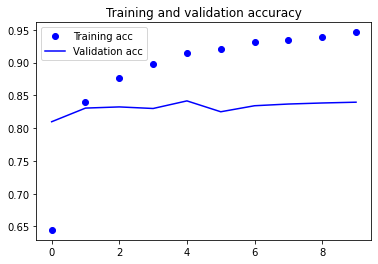

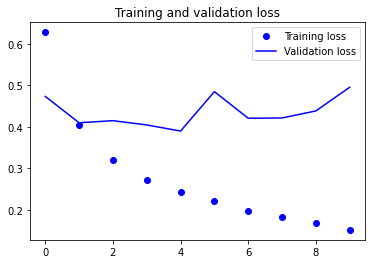

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Our previous model with only embedding layer gave us around 85% validation accuracy. This model with extra `SimpleRNN` layer performs even lower than 85%.  `SimpleRNN` isn't very good at processing long sequences, like text. Let's take a look at some more advanced layers.

## 3. Understand the LSTM layer in Keras <a id='lstm' />

We will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(LSTM(16, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 100, 8)            80000     
                                                                 
 lstm_2 (LSTM)               (None, 100, 16)           1600      
                                                                 
 dropout_4 (Dropout)         (None, 100, 16)           0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                2112      
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 83,729
Trainable params: 83,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 43s 53ms/step - loss: 0.4881 - acc: 0.7491 - val_loss: 0.3729 - val_acc: 0.8372
Epoch 2/10
625/625 [==============================] - 31s 50ms/step - loss: 0.3117 - acc: 0.8693 - val_loss: 0.4195 - val_acc: 0.8258
Epoch 3/10
625/625 [==============================] - 31s 49ms/step - loss: 0.2682 - acc: 0.8923 - val_loss: 0.3289 - val_acc: 0.8568
Epoch 4/10
625/625 [==============================] - 32s 51ms/step - loss: 0.2435 - acc: 0.9049 - val_loss: 0.3422 - val_acc: 0.8580
Epoch 5/10
625/625 [==============================] - 31s 50ms/step - loss: 0.2276 - acc: 0.9137 - val_loss: 0.3310 - val_acc: 0.8576
Epoch 6/10
625/625 [==============================] - 31s 50ms/step - loss: 0.2171 - acc: 0.9168 - val_loss: 0.3657 - val_acc: 0.8514
Epoch 7/10
625/625 [==============================] - 31s 50ms/step - loss: 0.2096 - acc: 0.9215 - val_loss: 0.3972 - val_acc: 0.8400
Epoch 8/10
625/625 [==============================] - 31s 49ms

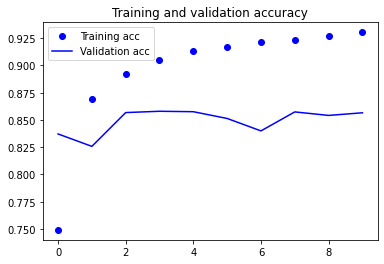

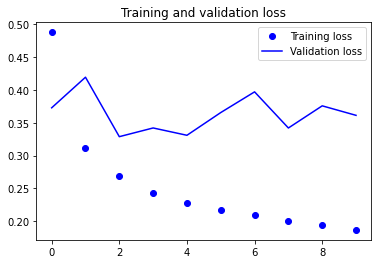

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This time you achieve around 86% validation accuracy, better than the `SimpleRNN` network because LSTM suffers less from the vanishing-gradient problem (i.e. perform better on long sequences inputs).

Still compared to the model without RNN layers at all, RNN layers did not improve the model performance a lot but suffers a lot of computational complexity, i.e. takes much longer time to train. 

For the simple sentiment analysis problem, probably we only need to use a simple linear model with embedding layer. RNN model is more useful on some more complex problems, e.g. generating a sequence of words and etc.

## 4. Exercise <a id='exc2'/>
We would like you to further improve the above model performance by tuning different hyperparametars. Below are a few suggestions you can try but feel free to adjust other hyperparametars if required.

1) Stack more recurrent layers on top of each other or remove recurrent layers. (Remember to set `return_sequences=True` for all the recurrent layers except the last one).

2) Add in dropout regularization. In RNN, there are two types of dropout regularization:
* dropout: the normal dropout which randomly drops the inputs of the layer;
* recurrent_dropout: special dropout for recurrent layer only, where the dropout happens within reccurnt unit between different Sates (t-1, t, t+1)


3) Use a different type of recurrent layer, e.g. **GRU(Gated Recurrent Units)**. Don't know what is GRU, please check out this [**website**](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21).

4) Tuning other suitable hyperparameters, e.g. embedding dimension, optimizer learning rate and etc.

Provide your codes & observations in the below code boxes & markdown boxes respectively.